# Learning the Wave Equation

See the library `nn_1d_pde` for more on this problem.

In [105]:
import numpy as np
from matplotlib import pylab as plt
from matplotlib import cm
plt.style.use('seaborn-paper')
import detest
import sympy

In [ ]:
import utils
import plotting
import helper
import models
# Hack for reloading in notebooks without reseting the kernel
import importlib
importlib.reload(utils)
importlib.reload(helper)
importlib.reload(plotting)
importlib.reload(models)

from helper import *
from utils import *
from analytical_solutions import *

In [77]:
# A few preset interesting functions
PAR = [
    {},
    {'u0':lambda x: -x**3+x},
    {'u0':lambda x: sympy.sin(2.0*x*sympy.pi)},
    {'u0':lambda x: sympy.sin(4.0*x*sympy.pi)},
    {'u0':lambda x: sympy.sin(3.0*x*sympy.pi)+sympy.sin(4.0*x*sympy.pi)},
    {'u0':lambda x: sympy.sin(2.0*x*sympy.pi)+sympy.sin(4.0*x*sympy.pi)},
    {'u0':lambda x: sympy.sin(2.0*x*sympy.pi)+sympy.sin(8.0*x*sympy.pi)},
    {'u0':lambda x: 10.0*(x-x**2)},
    {'u0':lambda x: 15.0*(-x+x**2)},
    {'u0':lambda x: -x**3+x**2},
]

In [78]:
def make_wave_dataset(NX,NT, params={}):
    """Returns a numpy array with dimensions (N_time=NT, N_channel=2, N_space=NX)"""
    xs = np.linspace(0,1,NX)
    ts = np.linspace(0,5,NT)
    grid = np.meshgrid(xs,ts)
    orc = detest.oracles.WaveEquation1D(params)
    res = orc(np.c_[grid[0].ravel(),grid[1].ravel()])

    for k in res.keys():
        res[k] = res[k].reshape(NT,1,NX)
    return np.concatenate([res['u'],res['v']], axis=1)

In [101]:
data = make_wave_dataset(10,25,params=PAR[1])

[0.19350920659919693, -0.024188650824899606, 0.007167007651822101, -0.0030235813531124464, 0.0015480736527935708, -0.0008958759564777596, 0.0005641667830880341, -0.00037794766913905347, 0.00026544472784526056, -0.00019350920659919448, 0.00014538633102868976, -0.00011198449455971839, 8.807883777842609e-05, -7.052084788600294e-05, 5.733606121457203e-05, -4.724345864238052e-05, 3.9387178220883785e-05, -3.318059098065654e-05, 2.8212451756695488e-05, -2.418865082489838e-05]


In [102]:
NT,_,NX = data.shape
data.shape

(25, 2, 10)

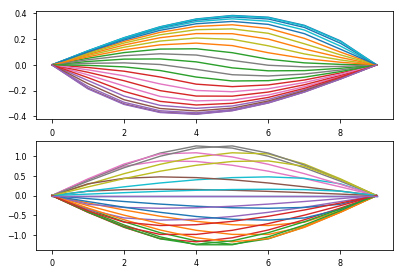

In [106]:
plt.subplot(2,1,1)
for i in range(NT):
    plt.plot(data[i,0,:])
plt.subplot(2,1,2)
for i in range(NT):
    plt.plot(data[i,1,:])

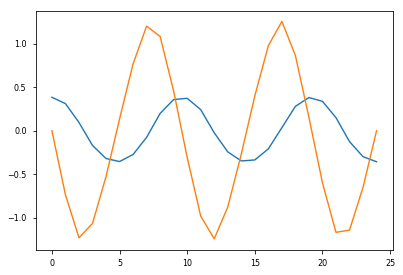

In [107]:
plt.plot(data[:,0,NX//2])
plt.plot(data[:,1,NX//2])

In [113]:
device=get_device()
set_seed()

Using the CPU


In [114]:
torch_data = data_to_torch(data, device=device)

In [116]:
model = M(NX,NX,bias=False).double()

In [117]:
model.weight

Parameter containing:
tensor([[-0.0265, -0.0108, -0.1186,  0.0727, -0.1809, -0.0558,  0.1226,  0.2968,
          0.0745, -0.1073],
        [ 0.0303, -0.0354,  0.1291,  0.0362,  0.1239,  0.3067, -0.1313, -0.0112,
          0.0727, -0.0021],
        [-0.0303, -0.2799, -0.2728, -0.2846, -0.3094, -0.2945, -0.2396, -0.2852,
         -0.2966,  0.1386],
        [ 0.1940,  0.2137,  0.1704,  0.1072,  0.1393, -0.1749,  0.2847, -0.0218,
          0.2728,  0.0969],
        [ 0.2475,  0.2523, -0.0661, -0.0920,  0.0476, -0.0134,  0.0495,  0.1604,
         -0.2471, -0.0145],
        [-0.2482,  0.3054, -0.2224,  0.0605, -0.0864,  0.1797,  0.0011, -0.0318,
          0.2315,  0.2888],
        [-0.2295, -0.3050,  0.0264,  0.0996,  0.0722,  0.2921,  0.1419, -0.1455,
         -0.2166,  0.2453],
        [ 0.3031, -0.1501, -0.2024,  0.1107, -0.2262, -0.0765, -0.3128,  0.0865,
         -0.1078, -0.1769],
        [-0.2011, -0.1113,  0.1502,  0.0179,  0.2723, -0.1130, -0.0925,  0.3095,
         -0.3016, -0.1245

In [118]:
learn_rnn(torch_data, model)

Using the CPU


(Linear(in_features=10, out_features=10, bias=False),
 array([0.33533909, 0.39653405, 0.34442049, ..., 0.06559099, 0.07213062,
        0.06512453]))

In [119]:
model.weight

Parameter containing:
tensor([[-0.0265,  0.0310, -0.0524,  0.0577, -0.0484,  0.0336, -0.0214,  0.0134,
         -0.0069, -0.1073],
        [ 0.0303, -0.2650, -0.0051,  0.0818,  0.1502,  0.2777, -0.1724,  0.0037,
          0.0823, -0.0021],
        [-0.0303, -0.0894, -0.0393,  0.1219,  0.1595,  0.1538,  0.1387,  0.0661,
          0.0040,  0.1386],
        [ 0.1940,  0.0157, -0.0185,  0.0795,  0.2191, -0.0329,  0.3866,  0.0459,
          0.2543,  0.0969],
        [ 0.2475,  0.2066, -0.0977, -0.0301,  0.1501,  0.1544,  0.2559,  0.4324,
          0.0147, -0.0145],
        [-0.2482,  0.2454, -0.2563,  0.1126, -0.0140,  0.2968,  0.1713,  0.2501,
          0.5149,  0.2888],
        [-0.2295, -0.3052, -0.0279,  0.0564,  0.0212,  0.2948,  0.2627,  0.2080,
          0.2422,  0.2453],
        [ 0.3031, -0.1355, -0.1830,  0.2186, -0.0376,  0.1913, -0.0194,  0.4336,
          0.1869, -0.1769],
        [-0.2011, -0.1790,  0.0208, -0.0862,  0.2170, -0.0595,  0.0317,  0.4689,
         -0.2778, -0.1245

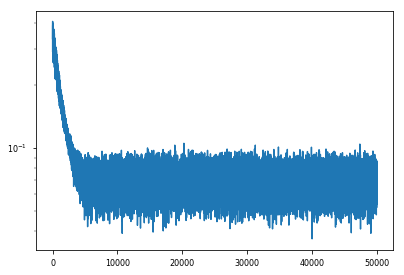

In [120]:
plt.semilogy(Out[118][1])

In [130]:
import functools

In [161]:
class MultiLinear(torch.nn.Module):
    """Like Linear, but allows for higher ranks."""
    def __init__(self, in_dims, out_dims, bias=True):
        super(MultiLinear, self).__init__()
        self.in_dims = in_dims
        self.out_dims = out_dims
        in_features = functools.reduce(lambda x,y:x*y, in_dims)
        out_features = functools.reduce(lambda x,y:x*y, out_dims)
        self.net = torch.nn.Linear(in_features, out_features, bias=bias)
    def forward(self, x):
        xflat = torch.flatten(x, start_dim=-len(self.in_dims)-1,end_dim=-1)
        hflat = self.net(xflat)
        return torch.reshape( hflat, hflat.shape[:-len(self.out_dims)-1]+self.out_dims )

In [162]:
mlin = MultiLinear( (2,10,),(2,10,) ).double()

In [163]:
mlin(torch_data[0:1,:,:])

tensor([[ 0.0500, -0.1798,  0.0735,  0.0826,  0.1523,  0.1054,  0.0294,  0.1148,
         -0.2484,  0.0095],
        [ 0.0364,  0.3232, -0.1850, -0.1561,  0.1719,  0.1619,  0.1206, -0.0241,
          0.0518,  0.1830]], dtype=torch.float64, grad_fn=<AsStridedBackward>)

In [122]:
integrate_model(model, torch_data[0,:,:],nsteps=10)

array([[ 0.00000000e+00,  1.09721775e-01,  2.11224960e-01,
         2.96284340e-01,  3.56664555e-01,  3.84121209e-01,
         3.70405632e-01,  3.07269151e-01,  1.86455752e-01,
         7.63870808e-17],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-1.69756192e-05,  1.06929421e-01,  2.06432744e-01,
         2.91593554e-01,  3.36349186e-01,  3.51463479e-01,
         3.04489759e-01,  2.32210125e-01,  1.17787195e-01,
        -2.25374328e-04],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 6.66360726e-04,  1.00629986e-01,  1.83622259e-01,
         2.41473969e-01,  2.77951416e-01,  2.76591877e-01,
         2.45542794e-01,  1.82893541e-01,  9.79531752e-02,
         1.